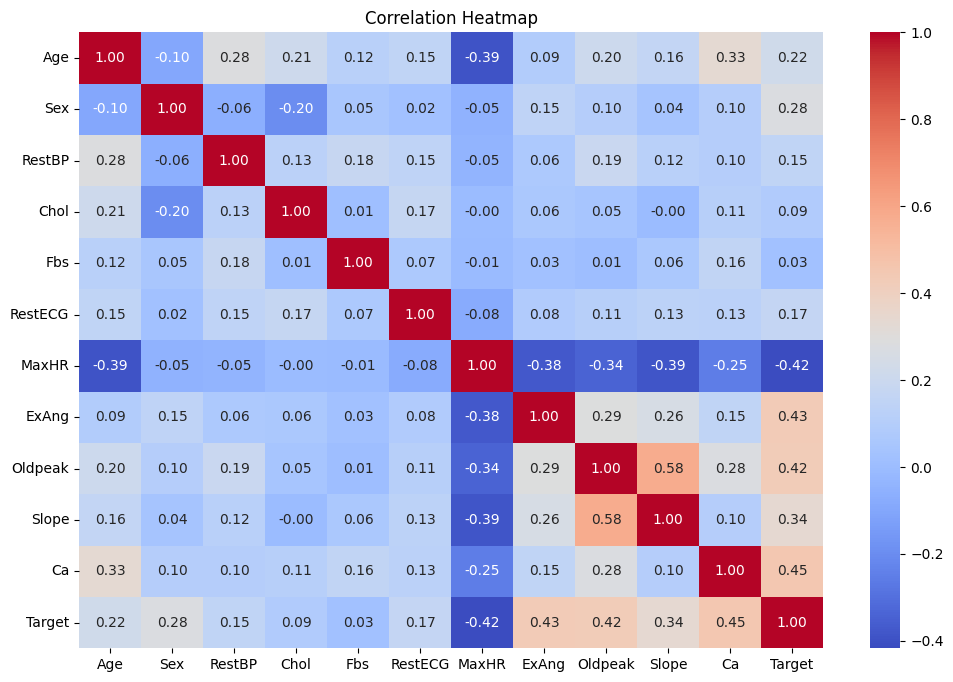

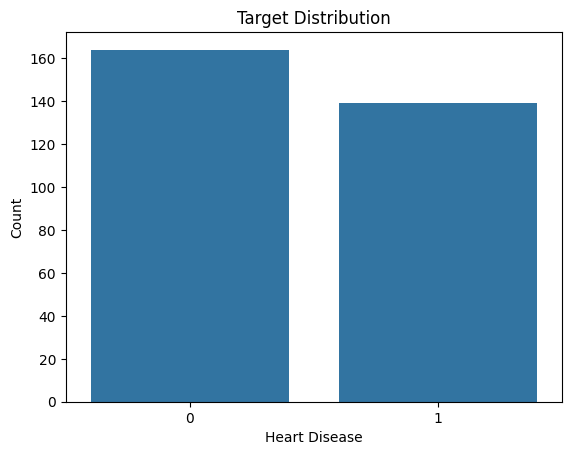

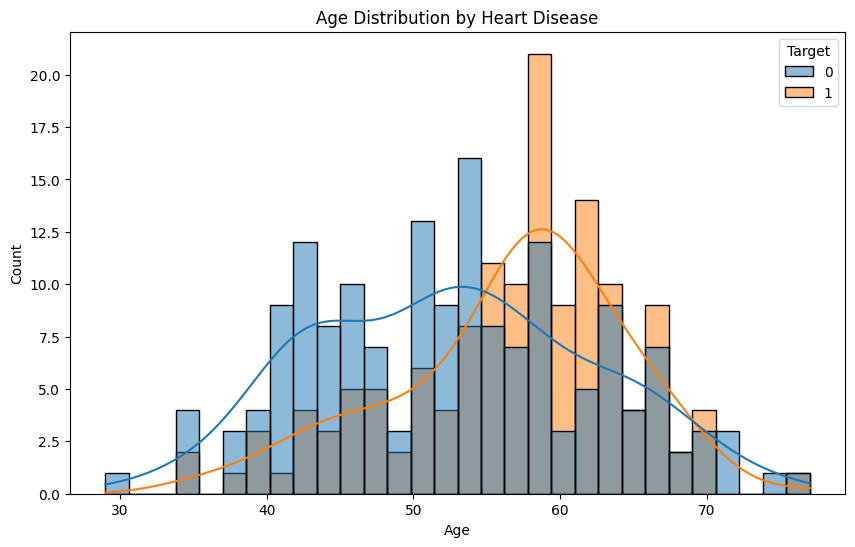

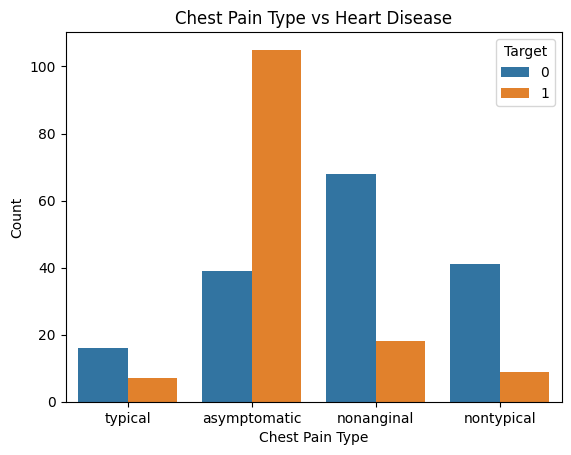

Accuracy: 0.8688524590163934

Confusion Matrix:
 [[24  5]
 [ 3 29]]

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.83      0.86        29
           1       0.85      0.91      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [1]:
# Heart Disease Prediction - Clean & GitHub Ready Version

# ======================= 📦 Imports =========================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# ===================== 📂 Load Data ==========================
df = pd.read_csv("heart.csv")

# =================== 🧹 Data Cleaning ========================
# Standardize ChestPain labels
if df['ChestPain'].dtype == object:
    df['ChestPain'] = df['ChestPain'].replace({
        'non-anginal': 'nonanginal',
        'nonspecific': 'nontypical',
        'typical': 'typical',
        'asymptomatic': 'asymptomatic'
    })

# ===================== 📊 EDA (Optional) =====================
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

sns.countplot(x='Target', data=df)
plt.title("Target Distribution")
plt.xlabel("Heart Disease")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,6))
sns.histplot(data=df, x='Age', hue='Target', bins=30, kde=True)
plt.title("Age Distribution by Heart Disease")
plt.show()

sns.countplot(x='ChestPain', hue='Target', data=df)
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type")
plt.ylabel("Count")
plt.show()

# ================ 🔄 Preprocessing ==========================
df_encoded = pd.get_dummies(df, columns=["ChestPain", "Thal"], drop_first=True)

# Separate Features and Target
X = df_encoded.drop("Target", axis=1)
y = df_encoded["Target"]

# Save training columns for Streamlit input alignment
joblib.dump(X.columns.tolist(), 'columns.pkl')

# Scale Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, "scaler.pkl")

# =================== 🤖 Model Training =======================
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
joblib.dump(model, "best_heart_model.pkl")

# ==================== 📈 Evaluation ==========================
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
